In [1]:
import os
import pandas as pd
import numpy as np
from datetime import datetime,timedelta 
from dateutil import tz
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
data_filepath = "C:/Users/glius/Google Drive/HOPE/outputs"

In [2]:
with open(data_filepath + '/speed1_all.pickle', 'rb') as handle:
    speed1_all = pickle.load(handle)
with open(data_filepath + '/speed2_all.pickle', 'rb') as handle:
    speed2_all = pickle.load(handle)

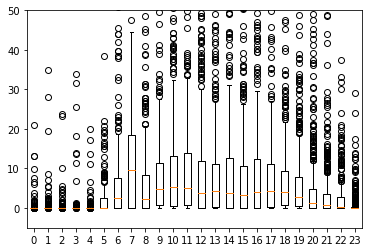

In [3]:
labels,data = speed1_all.keys(), list(speed1_all.values())
plt.boxplot(data)
plt.xticks(range(1, len(labels) + 1), labels)
plt.ylim(-5,50)
plt.show()

In [4]:
import csv
with open('speed1_all.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(data)

In [5]:
folder_path = data_filepath + "/step_counts_hourly"
filenames = os.listdir(folder_path)
filenames

['1s5wlcm6.csv',
 '2n18iikg.csv',
 '3j2fdbb.csv',
 '4uu7odcm.csv',
 '5iv5o89o.csv',
 '7ijvywnb.csv',
 '8lqhw9ep.csv',
 '8r4hkqi6.csv',
 'aej6wxh8.csv',
 'akka6vtq.csv',
 'behdfa31.csv',
 'boai4zds.csv',
 'btjka62m.csv',
 'cpjgpdpc.csv',
 'dglk2mak.csv',
 'i5b2fdez.csv',
 'j8soi1xe.csv',
 'kzt9osem.csv',
 'mk9ee8p4.csv',
 'nnu1qurv.csv',
 'nzvk7jwo.csv',
 'o3ze4d97.csv',
 'o912nw3y.csv',
 'rccun.csv',
 'rmtdpger.csv',
 'see4r8y6.csv',
 'srpx1ilr.csv',
 't9xq7k8b.csv',
 'ud1ic49g.csv',
 'uiwlw4n5.csv',
 'unlkfxnc.csv',
 'vby6fos4.csv',
 'xcdydxji.csv']

In [ ]:
K = 3
for filename in filenames:
  data = pd.read_csv(folder_path+"/"+filename)
  daily_result = pd.DataFrame({"id":[],"date":[],"imp_mean":[],"imp_var":[]})
  for i in np.unique(data.date):
    sub_data = data[data.date==i]
    daily_est = 0
    daily_var = 0
    for j in range(23):
      if sum(j==sub_data.hour)==0:
        speed2 = speed2_all[j]
        r = np.random.choice(range(len(speed2)),K)
        s = speed2[r]
        imputed_steps = 60*s
        hour_est =  np.mean(imputed_steps)
        hour_var =  np.var(imputed_steps)
      else:
        hour_est = np.mean(sub_data.imp_mean[sub_data.hour==j])
        hour_var = np.mean(sub_data.imp_var[sub_data.hour==j])
      daily_est = daily_est + hour_est
      daily_var = daily_var + hour_var
    daily_result = daily_result.append({"id":np.array(sub_data.id)[0],"date":np.array(sub_data.date)[0],"imp_mean":daily_est,"imp_var":daily_var},ignore_index=True)
  daily_result.to_csv(data_filepath + "/step_counts_daily/"+filename,index=False)  